# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [2]:
#load dataset
df=pd.read_csv("credit_card.csv")
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


# primary analysis
* CUSTID : Identification of Credit Card holder (Categorical)
* BALANCE : Balance amount left in their account to make purchases
* BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
* PURCHASES : Amount of purchases made from account
* ONEOFFPURCHASES : Maximum purchase amount done in one-go
* INSTALLMENTSPURCHASES : Amount of purchase done in installment
* CASHADVANCE : Cash in advance given by the user
* PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
* ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
* PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
* CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
* CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
* PURCHASESTRX : Numbe of purchase transactions made
* CREDITLIMIT : Limit of Credit Card for user
* PAYMENTS : Amount of Payment done by user
* MINIMUM_PAYMENTS : Minimum amount of payments made by user
* PRCFULLPAYMENT : Percent of full payment paid by user
* TENURE : Tenure of credit card service for user


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

# Q2. EDA

## a. Missing Value Analysis


In [4]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [5]:
df1 = df.drop('CUST_ID', axis = 1)
df1.fillna(method ='bfill', inplace = True)

## Outlier Treatment using z-score formula

In [6]:
for i in df1.select_dtypes(include=['float64','int64']).columns:
    max_threshold=df1[i].quantile(0.95)
    min_threshold=df1[i].quantile(0.05)
    df1_no_outlier=df1[(df1[i] < max_threshold) & (df1[i] > min_threshold)].shape
    print(" outlier in ",i,"is" ,int(((df1.shape[0]-df1_no_outlier[0])/df1.shape[0])*100),"%")

 outlier in  BALANCE is 10 %
 outlier in  BALANCE_FREQUENCY is 75 %
 outlier in  PURCHASES is 27 %
 outlier in  ONEOFF_PURCHASES is 53 %
 outlier in  INSTALLMENTS_PURCHASES is 48 %
 outlier in  CASH_ADVANCE is 56 %
 outlier in  PURCHASES_FREQUENCY is 47 %
 outlier in  ONEOFF_PURCHASES_FREQUENCY is 53 %
 outlier in  PURCHASES_INSTALLMENTS_FREQUENCY is 58 %
 outlier in  CASH_ADVANCE_FREQUENCY is 57 %
 outlier in  CASH_ADVANCE_TRX is 56 %
 outlier in  PURCHASES_TRX is 27 %
 outlier in  CREDIT_LIMIT is 14 %
 outlier in  PAYMENTS is 10 %
 outlier in  MINIMUM_PAYMENTS is 10 %
 outlier in  PRC_FULL_PAYMENT is 71 %
 outlier in  TENURE is 91 %


In [7]:
max_threshold_BALANCE=df1["BALANCE"].quantile(0.95)
min_threshold_BALANCE=df1["BALANCE"].quantile(0.05)
max_threshold_CREDIT_LIMIT=df1["CREDIT_LIMIT"].quantile(0.95)
min_threshold_CREDIT_LIMIT=df1["CREDIT_LIMIT"].quantile(0.05)
max_threshold_PAYMENTS=df1["PAYMENTS"].quantile(0.95)
min_threshold_PAYMENTS=df1["PAYMENTS"].quantile(0.05)
df1_no_outlier=df1[(df1["CREDIT_LIMIT"] < max_threshold_CREDIT_LIMIT) & (df1["CREDIT_LIMIT"] > min_threshold_CREDIT_LIMIT) & (df1["BALANCE"] < max_threshold_BALANCE) & (df1["BALANCE"] > min_threshold_BALANCE) &  (df1["PAYMENTS"] < max_threshold_PAYMENTS) & (df1["PAYMENTS"] > min_threshold_PAYMENTS)]

In [8]:
normalized_df = pd.DataFrame(normalize(df1_no_outlier))
normalized_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.293876,0.000083,0.000000,0.000000,0.000000,0.59124,0.000000,0.000000,0.000000,0.000023,0.000367,0.000000,0.642358,0.376516,0.098404,0.00002,0.001101
1,0.310798,0.000125,0.096307,0.096307,0.000000,0.00000,0.000125,0.000125,0.000000,0.000000,0.000000,0.001495,0.934206,0.077485,0.078135,0.00000,0.001495
2,0.504284,0.000617,0.009867,0.009867,0.000000,0.00000,0.000051,0.000051,0.000000,0.000000,0.000000,0.000617,0.740040,0.418329,0.150963,0.00000,0.007400
3,0.428658,0.000237,0.315788,0.000000,0.315788,0.00000,0.000158,0.000000,0.000138,0.000000,0.000000,0.001895,0.426330,0.331604,0.570156,0.00000,0.002842
4,0.584314,0.000320,0.139762,0.000000,0.139762,0.00000,0.000320,0.000000,0.000320,0.000000,0.000000,0.003845,0.736940,0.217578,0.170468,0.00000,0.003845


## c. Deal with correlated variables

<AxesSubplot:>

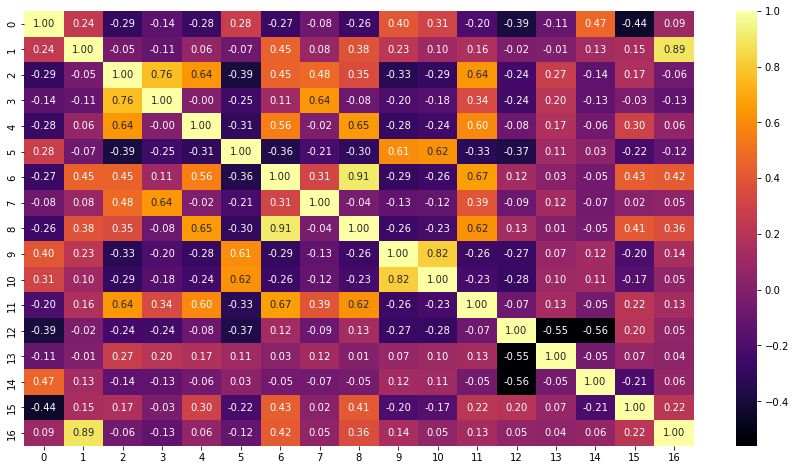

In [9]:
fig = plt.subplots(figsize=(15,8))
sns.heatmap(normalized_df.corr(),
            annot=True,
            fmt="0.2f",
            cmap="inferno")

# Q3. PCA

In [10]:
pca = PCA() 
pcadf = pca.fit_transform(normalized_df) 
pcadf = pd.DataFrame(pcadf) 

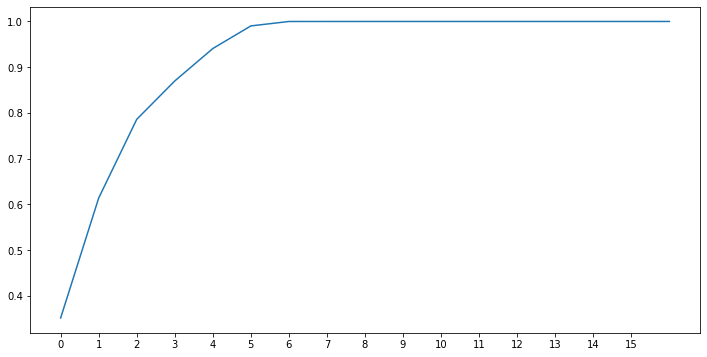

In [11]:
plt.subplots(figsize=(12,6))
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.xticks(np.arange(0,16,1));

### Choose n_components as 5 (95% variance)

In [12]:
pca = PCA(n_components = 5) 
pcadf = pca.fit_transform(normalized_df) 
pcadf = pd.DataFrame(pcadf) 
pcadf.columns = ['PC1', 'PC2','PC3','PC4','PC5']   

pcadf.head()

,PC1,PC2,PC3,PC4,PC5
0,0.346585,-0.032200,0.380624,-0.035642,0.018816
1,-0.126068,-0.226061,-0.140287,-0.046067,-0.063836
2,0.162606,-0.023479,-0.123465,0.181440,-0.248537
3,0.259072,0.336400,-0.358673,0.224421,0.245234
4,0.154561,-0.057130,-0.273424,0.037757,-0.129358


In [13]:
pca.explained_variance_ratio_

array([0.35116079, 0.26244421, 0.17220986, 0.08400025, 0.07095013])

In [14]:
pca.explained_variance_ratio_.cumsum()

array([0.35116079, 0.613605  , 0.78581486, 0.8698151 , 0.94076523])

# Q4. Elbow method
### Choosing k as number of clusters

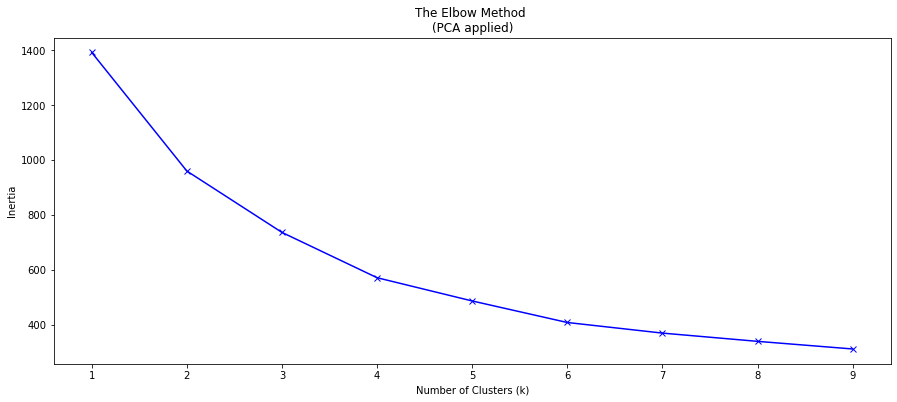

In [15]:
inertia = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(pcadf)
    inertia.append(kmeanModel.inertia_)
plt.figure(figsize=(15,6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('The Elbow Method \n(PCA applied)')
plt.show()

# Q5

In [16]:
def evaluate(model, data, silhouette_visualizer=False):
    if silhouette_visualizer:
        from yellowbrick.cluster import SilhouetteVisualizer
        visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
        visualizer.fit(data)
    y = model.fit_predict(data)
    SC = "Silhouette Score"+" : "+str("{:.2f}".format(silhouette_score(data, y)))
    print(SC)

### KMeans

In [17]:
for i in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    print("Number of Clusters : " + str(i))
    evaluate(kmeans, pcadf)
    print("====================")

Number of Clusters : 2
Silhouette Score : 0.33
Number of Clusters : 3
Silhouette Score : 0.34
Number of Clusters : 4
Silhouette Score : 0.37
Number of Clusters : 5
Silhouette Score : 0.38
Number of Clusters : 6
Silhouette Score : 0.40
Number of Clusters : 7
Silhouette Score : 0.34
Number of Clusters : 8
Silhouette Score : 0.34
Number of Clusters : 9
Silhouette Score : 0.34
Number of Clusters : 10
Silhouette Score : 0.34


Silhouette Score : 0.38


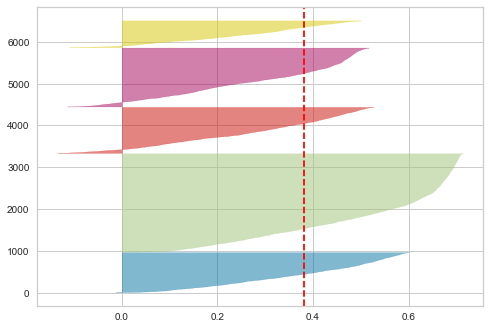

In [18]:
kmeans = KMeans(n_clusters=5, random_state=42)
evaluate(kmeans, pcadf, silhouette_visualizer=True)